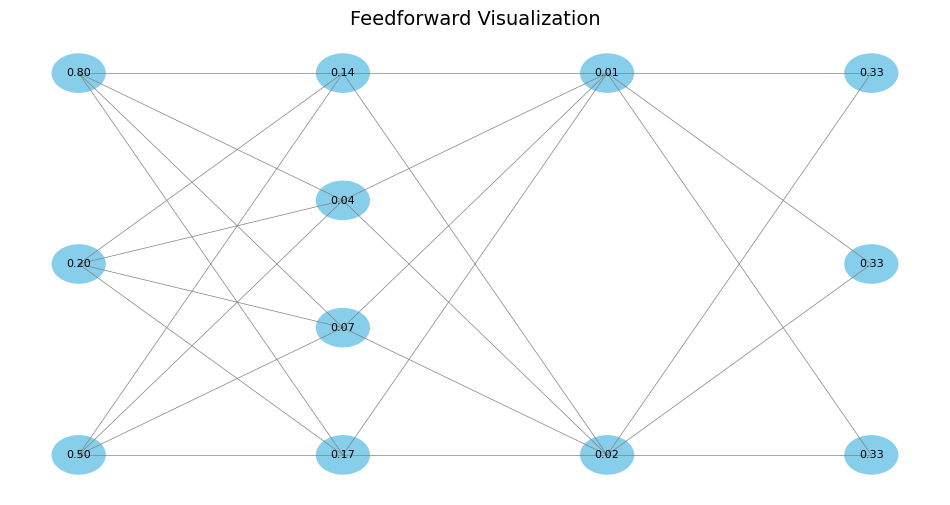

Layer 1:
Pre-activation (z):
[0.1745048  0.07121359 0.03621977 0.13975268]
Activation (a):
[0.1745048  0.07121359 0.03621977 0.13975268]

Layer 2:
Pre-activation (z):
[0.02041782 0.0138091 ]
Activation (a):
[0.02041782 0.0138091 ]

Layer 3:
Pre-activation (z):
[-0.00431006  0.00074013  0.002626  ]
Activation (a):
[0.33200276 0.33368368 0.33431356]

Layer 1 weight update:
[[-0.00084648 -0.00033859 -0.00135437]
 [-0.00063555 -0.00025422 -0.00101688]
 [-0.00112267 -0.00044907 -0.00179628]
 [-0.00207126 -0.0008285  -0.00331402]]
Layer 1 bias update:
[-0.00169297 -0.0012711  -0.00224535 -0.00414252]

Layer 2 weight update:
[[-0.01160069 -0.00473412 -0.00240781 -0.00929045]
 [ 0.00393169  0.00160448  0.00081605  0.00314871]]
Layer 2 bias update:
[-0.06647779  0.02253057]

Layer 3 weight update:
[[ 0.00677877  0.00458466]
 [-0.01360472 -0.00920123]
 [ 0.00682595  0.00461657]]
Layer 3 bias update:
[ 0.33200276 -0.66631632  0.33431356]



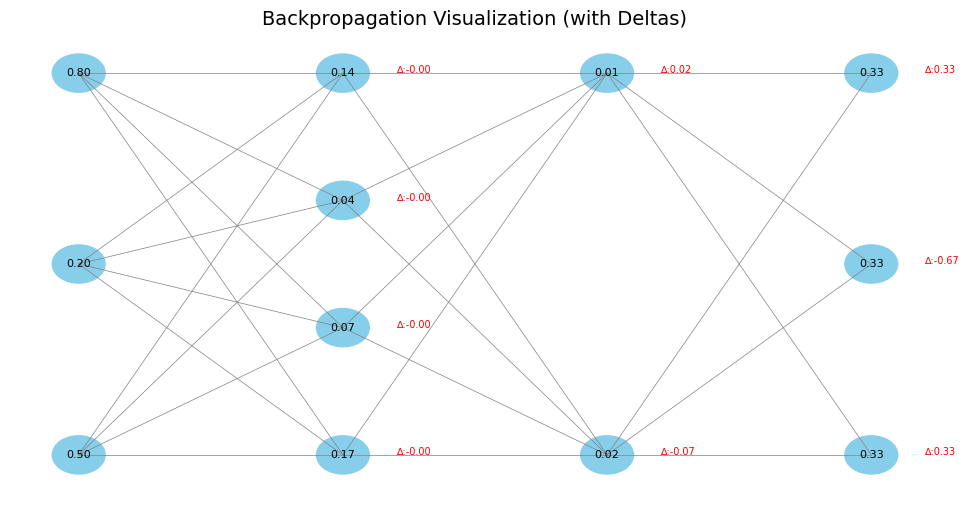

In [5]:
import numpy as np  # Import numpy for numerical operations
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import matplotlib.patches as mpatches  # For drawing arrows and boxes

# ---------------------------- Activation Functions ----------------------------

def relu(x):
    """ReLU activation function."""
    return np.maximum(0, x)

def relu_derivative(x):
    """Derivative of ReLU for backpropagation."""
    return (x > 0).astype(float)

def softmax(x):
    """Softmax activation function for output layer."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0, keepdims=True)

# ---------------------------- Initialize Network ----------------------------

np.random.seed(0)  # For reproducibility

# Layer sizes: 3 -> 4 -> 2 -> 3
layer_sizes = [3, 4, 2, 3]

# Initialize weights and biases with small random numbers and zeros respectively
weights = [
    np.random.randn(layer_sizes[i], layer_sizes[i-1]) * 0.1 for i in range(1, len(layer_sizes))
]
biases = [
    np.zeros((layer_sizes[i], 1)) for i in range(1, len(layer_sizes))
]

# ---------------------------- Visualization Function (nicht Prüfungsrelevant)----------------------------

def visualize_network(activations, title, deltas=None):
    """Draws the feedforward activations and optionally backpropagation deltas."""
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.axis('off')
    ax.set_title(title, fontsize=14)

    layer_positions = [1, 3, 5, 7]  # x-coordinates for each layer
    max_neurons = max(layer_sizes)

    node_coords = []  # To store y-coordinates for each layer

    for layer_idx, a in enumerate(activations):
        layer_x = layer_positions[layer_idx]
        layer_y = np.linspace(0, max_neurons, len(a))
        node_coords.append(layer_y)

        for i, val in enumerate(a):
            circle = plt.Circle((layer_x, layer_y[i]), 0.2, color='skyblue')
            ax.add_patch(circle)
            ax.text(layer_x, layer_y[i], f"{val[0]:.2f}", fontsize=8, ha='center', va='center')

    # Draw connections
    for i in range(len(activations) - 1):
        x0 = layer_positions[i]
        x1 = layer_positions[i+1]
        y0 = node_coords[i]
        y1 = node_coords[i+1]

        for j, y_start in enumerate(y0):
            for k, y_end in enumerate(y1):
                ax.plot([x0, x1], [y_start, y_end], color='gray', linewidth=0.5)

    # Optionally draw backpropagation deltas
    if deltas:
        for l, delta in enumerate(deltas):
            x = layer_positions[l+1]
            y = node_coords[l+1]
            for i, d in enumerate(delta):
                ax.text(x + 0.4, y[i], f"∆:{d[0]:.2f}", fontsize=7, color='red')

    plt.show()

# ---------------------------- Forward Pass ----------------------------

def forward_pass(x, weights, biases):
    """Performs one forward pass and stores all activations and pre-activations."""
    a = x  # Input vector
    activations = [a]  # List to store activations
    zs = []  # List to store weighted inputs

    for i in range(len(weights)):
        z = np.dot(weights[i], a) + biases[i]  # Weighted sum
        zs.append(z)  # Store pre-activation

        # Apply ReLU for all hidden layers, softmax at output
        if i == len(weights) - 1:
            a = softmax(z)
        else:
            a = relu(z)

        activations.append(a)

    return activations, zs

# ---------------------------- Backward Pass (Dot Product Only) ----------------------------

def backward_pass(x, y_true, weights, biases, learning_rate=0.01):
    """Performs one backpropagation using only dot product differences (no gradients)."""
    activations, zs = forward_pass(x, weights, biases)  # Forward pass

    # Visualize feedforward
    visualize_network(activations, "Feedforward Visualization")

    # Initialize weight and bias updates with zeros
    delta_weights = [np.zeros_like(w) for w in weights]
    delta_biases = [np.zeros_like(b) for b in biases]
    deltas = [None] * len(weights)

    # Error at output: simple dot product based update
    y_pred = activations[-1]
    delta = y_pred - y_true  # No gradient; pure difference
    deltas[-1] = delta
    delta_weights[-1] = np.dot(delta, activations[-2].T)
    delta_biases[-1] = delta

    # Propagate backwards with dot products (not gradient-based)
    for l in range(2, len(layer_sizes)):
        delta = np.dot(weights[-l + 1].T, delta)
        deltas[-l] = delta
        delta_weights[-l] = np.dot(delta, activations[-l - 1].T)
        delta_biases[-l] = delta

    # Print values layer by layer (nicht Prüfungsrelevant)
    for i, (a, z) in enumerate(zip(activations[1:], zs), start=1):
        print(f"Layer {i}:\nPre-activation (z):\n{z.flatten()}\nActivation (a):\n{a.flatten()}\n")

    # Update parameters with dot-product based error signal
    for i in range(len(weights)):
        weights[i] -= learning_rate * delta_weights[i]
        biases[i] -= learning_rate * delta_biases[i]

        print(f"Layer {i+1} weight update:\n{delta_weights[i]}") # nicht Prüfungsrelevant
        print(f"Layer {i+1} bias update:\n{delta_biases[i].flatten()}\n") # nicht Prüfungsrelevant

    # Visualize backpropagation deltas
    visualize_network(activations, "Backpropagation Visualization (with Deltas)", deltas)

    return weights, biases

# ---------------------------- Sample Input and Execution ----------------------------

x = np.array([[0.5], [0.2], [0.8]])  # Input vector of size 3 (matches input layer)
y_true = np.array([[0.0], [1.0], [0.0]])  # One-hot encoded target output for 3 classes

# Perform one forward and one backward pass
weights, biases = backward_pass(x, y_true, weights, biases, learning_rate=0.01)

### Erklärung der Zeile: `weights[i] -= learning_rate * delta_weights[i]`

Diese Zeile stammt aus dem Backpropagation-Algorithmus eines neuronalen Netzes und aktualisiert die Gewichte einer bestimmten Schicht `i`.

---

#### 🔍 Aufschlüsselung der Bestandteile:

| Ausdruck | Bedeutung |
|----------|-----------|
| `weights[i]` | Die aktuelle Gewichtsmatrix der Schicht `i`. Sie verbindet die Neuronen von Schicht `i` zu Schicht `i+1`. |
| `delta_weights[i]` | Der berechnete Anpassungswert für die Gewichte dieser Schicht, basierend auf dem Fehler und dem Einfluss jedes Gewichts. |
| `learning_rate` | Die Lernrate, ein kleiner positiver Wert (z. B. `0.01`), der festlegt, **wie stark** die Gewichte angepasst werden. |
| `*` | Elementweise Multiplikation: Jedes Gewicht wird individuell angepasst. |
| `-=` | Subtraktion: Die Gewichte werden **in Richtung des Fehlers reduziert**, um den Verlust zu minimieren. |

---

#### 💡 Intuition:

> „Aktualisiere die Gewichte, indem du sie ein kleines Stück in die Richtung bewegst, die den Fehler verringert.“

Man „bestraft“ die Gewichte, die zum Fehler beigetragen haben, und „belohnt“ die nützlichen.

---

#### Analogie:

Stell dir vor, du steuerst ein Auto (die Gewichte) zu einem Ziel (korrekte Ausgabe). Wenn du leicht vom Kurs abkommst, passt du dein Lenkrad (die Gewichte) vorsichtig an. Die `learning_rate` verhindert, dass du zu stark lenkst.

---

#### Ziel:

Diese Zeile ist der Kern des Lernens in neuronalen Netzen – durch kleine, gezielte Anpassungen lernen die Gewichte, wie sie bessere Vorhersagen treffen können.


### Erklärung der Zeile: `biases[i] -= learning_rate * delta_biases[i]`

Diese Zeile aktualisiert den **Bias-Vektor (Schwellenwert)** der Schicht `i` während des Backpropagation-Schritts im neuronalen Netz.

---

#### 🔍 Aufschlüsselung der Bestandteile:

| Ausdruck | Bedeutung |
|----------|-----------|
| `biases[i]` | Der aktuelle Bias-Vektor der Schicht `i`. Jeder Neuron in dieser Schicht hat einen eigenen Bias-Wert. |
| `delta_biases[i]` | Der berechnete Änderungswert für die Biases, basierend auf dem Fehler in der Ausgabe dieser Schicht. |
| `learning_rate` | Die Lernrate, ein kleiner positiver Wert (z. B. `0.01`), der bestimmt, **wie stark** die Biases angepasst werden. |
| `*` | Elementweise Multiplikation: Jeder Bias wird individuell angepasst. |
| `-=` | Subtraktion: Die Biases werden **in Richtung der Fehlerreduktion** angepasst. |

---

#### 💡 Intuition:

> „Passe den Bias jedes Neurons so an, dass die Ausgabe des Neurons in Zukunft näher am erwarteten Zielwert liegt.“

Die Bias-Werte beeinflussen, **wann ein Neuron „aktiviert“ wird**. Durch diese Zeile wird gelernt, ob ein Neuron leichter oder schwerer aktiviert werden soll.

---

#### Analogie:

Stell dir ein Licht mit Bewegungsmelder vor. Der Bias ist wie die Empfindlichkeit des Sensors. Diese Zeile sagt: „Passe die Empfindlichkeit basierend auf dem Fehler leicht an.“

---

#### Ziel:

Mit dieser Zeile lernt das neuronale Netz, **wann** (und wie stark) ein Neuron feuern soll, indem der Bias schrittweise korrigiert wird.
